<a href="https://colab.research.google.com/github/yohanesnuwara/geostatistics/blob/main/project_notebooks/gullfaks_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!pip install geostatspy
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButtons
import ipywidgets as widgets

plt.style.use("classic")

In [ ]:
!git clone https://github.com/yohanesnuwara/geostatistics

Cloning into 'geostatistics'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 57 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [ ]:
# Load well top data
colnames = ["UTM X", "UTM Y", "TVD", "Top Name", "Well Name"]
welltop = pd.read_csv("/content/geostatistics/data/gullfaks/welltops.txt", sep=" ", 
                   header=17, usecols=[0,1,2,5,6], names=colnames)

# Invert -TVD to +TVD
welltop["TVD"] = welltop["TVD"] * -1

welltop.head(10)

,UTM X,UTM Y,TVD,Top Name,Well Name
0,457746.94,6787092.61,1886.76,Base Cretaceous,B8
1,456719.08,6785550.13,1836.19,Base Cretaceous,B9
2,453078.12,6786788.35,1996.92,Base Cretaceous,C1
3,454686.86,6787607.12,1977.81,Base Cretaceous,C2
4,456306.69,6788724.75,1989.68,Base Cretaceous,C3
5,454693.38,6786210.63,1965.23,Base Cretaceous,C4
6,453511.61,6783001.80,1916.14,Base Cretaceous,C5
7,451500.88,6781788.24,2000.51,Base Cretaceous,C6
8,452234.66,6784852.47,2000.56,Base Cretaceous,C7
9,458424.19,6785838.01,1812.87,Base Cretaceous,B2


In [ ]:
# Load seismic horizon data
colnames = ["A", "B", "UTM X", "UTM Y", "TWT"]

seis_creta  = np.loadtxt("/content/geostatistics/data/gullfaks/Base Cretaceous")
seis_creta  = pd.DataFrame(seis_creta, columns=colnames)

seis_etive  = np.loadtxt("/content/geostatistics/data/gullfaks/Top Etive")
seis_etive  = pd.DataFrame(seis_etive, columns=colnames)

seis_ness   = np.loadtxt("/content/geostatistics/data/gullfaks/Top Ness")
seis_ness   = pd.DataFrame(seis_ness, columns=colnames)

seis_tarb   = np.loadtxt("/content/geostatistics/data/gullfaks/Top Tarbert")
seis_tarb   = pd.DataFrame(seis_tarb, columns=colnames)

seis_creta.head()

,A,B,UTM X,UTM Y,TWT
0,0.0,0.0,450599.91,6779411.28,1947.849
1,0.0,0.0,450612.41,6779410.48,1944.908
2,0.0,0.0,450624.91,6779410.48,1943.849
3,0.0,0.0,450637.41,6779410.48,1943.849
4,0.0,0.0,450649.91,6779410.48,1943.849


In [ ]:
# Separate the well top w.r.t. each top names
topnames = ["Base Cretaceous", "Top Etive", "Top Ness", "Top Tarbert"]

dfs = []
for i in topnames:
  mask = welltop["Top Name"] == i
  df = welltop[mask]
  dfs.append(df)

well_creta, well_etive, well_ness, well_tarb = dfs

well_creta.head()

,UTM X,UTM Y,TVD,Top Name,Well Name
0,457746.94,6787092.61,1886.76,Base Cretaceous,B8
1,456719.08,6785550.13,1836.19,Base Cretaceous,B9
2,453078.12,6786788.35,1996.92,Base Cretaceous,C1
3,454686.86,6787607.12,1977.81,Base Cretaceous,C2
4,456306.69,6788724.75,1989.68,Base Cretaceous,C3


## Well and seismic top visualization

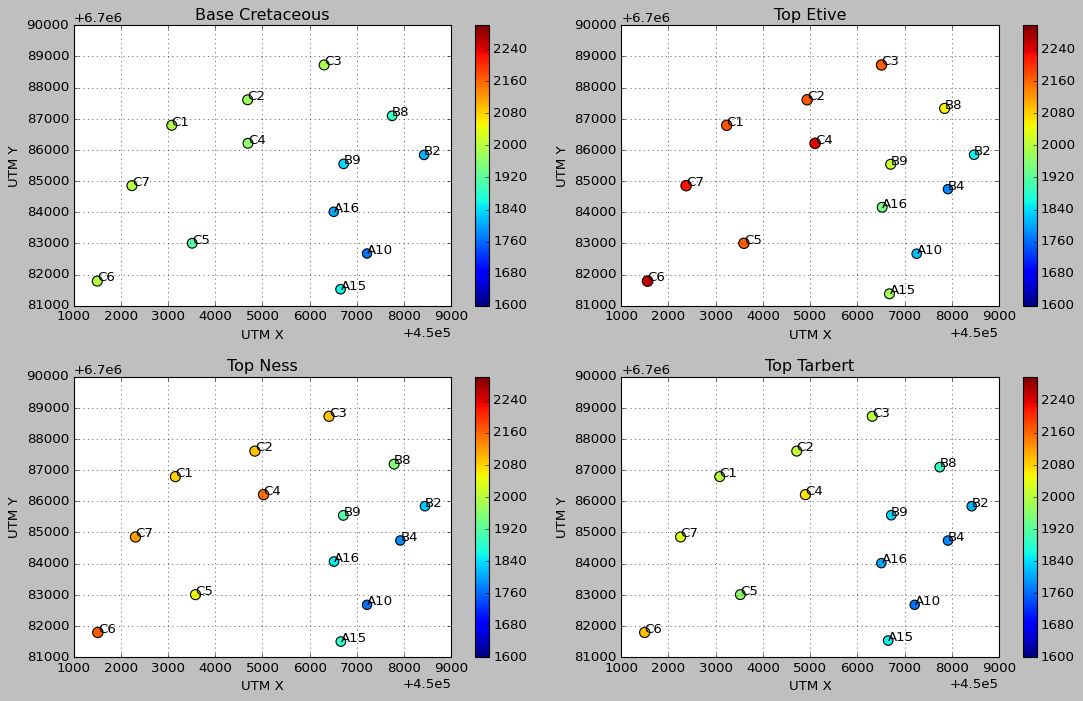

In [ ]:
plt.figure(figsize=(14,9))

for i in range(len(topnames)):
  x = dfs[i]["UTM X"].values
  y = dfs[i]["UTM Y"].values
  z = dfs[i]["TVD"].values

  plt.subplot(2,2,i+1)
  plt.scatter(x, y, c=z, s=z/25)
  
  # Annotate with well names
  wellname = dfs[i]["Well Name"].values
  for j, txt in enumerate(wellname):
      plt.annotate(txt, (x[j], y[j]))  

  plt.colorbar()
  plt.clim(1600,2300)
  plt.title(topnames[i])
  plt.xlabel("UTM X"); plt.ylabel("UTM Y")
  plt.grid()

plt.tight_layout(1.3)
plt.show()

In [ ]:
7000 / 

SyntaxError: ignored

In [ ]:
lag_dist = 1000


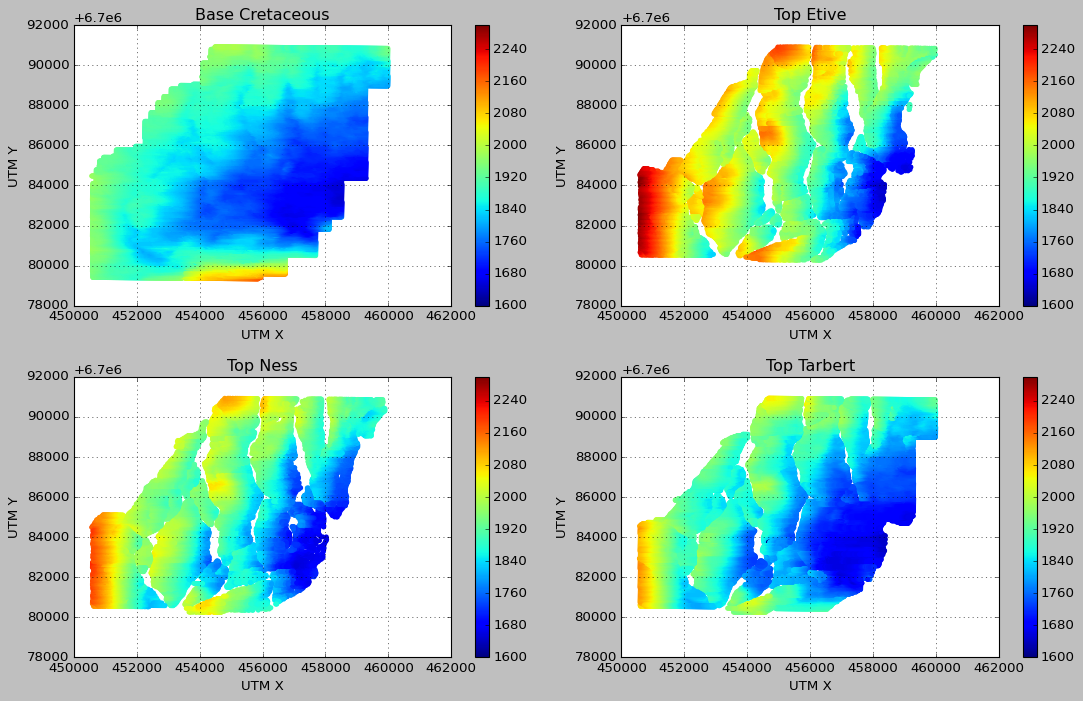

In [ ]:
seis_tops = [seis_creta, seis_etive, seis_ness, seis_tarb]

plt.figure(figsize=(14,9))
for i in range(len(topnames)):
  x, y, z = seis_tops[i]["UTM X"].values, seis_tops[i]["UTM Y"].values, \
  seis_tops[i]["TWT"].values

  plt.subplot(2,2,i+1)
  plt.scatter(x, y, c=z, edgecolor=None, linewidth=0)  

  plt.colorbar()
  plt.clim(1600,2300)
  plt.title(topnames[i])
  plt.xlabel("UTM X"); plt.ylabel("UTM Y")
  plt.grid()

plt.tight_layout(1.3)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, linewidth=0)
ax.set_zlim(2300, 1600)

plt.show()

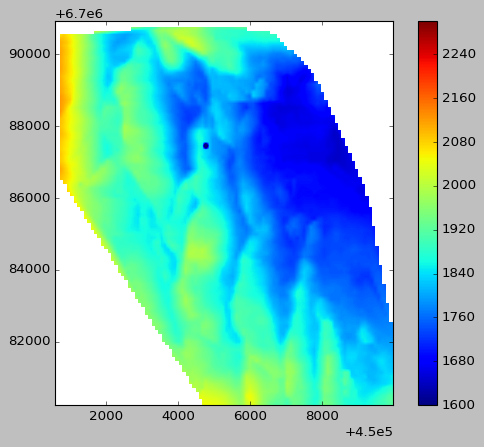

In [ ]:
from scipy.interpolate import griddata

x, y, z = seis_tops[i]["UTM X"].values, seis_tops[i]["UTM Y"].values, seis_tops[i]["TWT"].values

xi = np.arange(x.min(), x.max(), (x.max()-x.min()) / 100)
yi = np.arange(y.min(), y.max(), (y.max()-y.min()) / 100)
xi, yi = np.meshgrid(xi, yi)

# interpolate
zi = griddata((x, y), z, (xi.T, yi.T), method='linear')

plt.imshow(zi.T, extent=(x.min(), x.max(), y.min(), y.max()))
plt.colorbar()
plt.clim(1600,2300)

plt.show()

## KDE plot

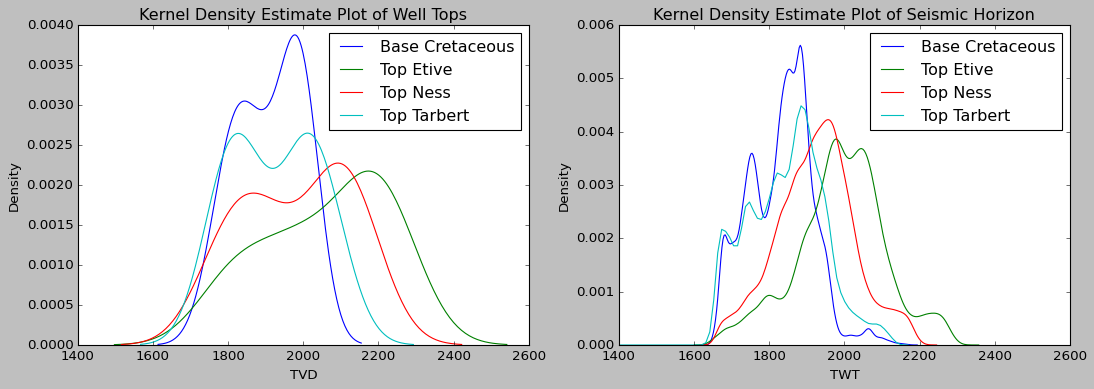

In [ ]:
plt.figure(figsize=(16,5))

# KDE plot of well tops
plt.subplot(1,2,1)
for i in range(len(topnames)):
  z = dfs[i]["TVD"].values

  sns.kdeplot(z, Label=topnames[i])  

  plt.title("Kernel Density Estimate Plot of Well Tops")
  plt.xlabel("TVD")

plt.legend()

# KDE plot of seismic tops
seis_tops = [seis_creta, seis_etive, seis_ness, seis_tarb]

plt.subplot(1,2,2)

for i in range(len(topnames)):
  z = seis_tops[i]["TWT"].values

  sns.kdeplot(z, Label=topnames[i])  

  plt.title("Kernel Density Estimate Plot of Seismic Horizon")
  plt.xlabel("TWT")

plt.xlim(1400,2600)

plt.legend()
plt.show()

In [ ]:
a = [1,2,3,4]
b = ['Base Cretaceous', 'Top Etive', 'Top Ness', 'Top Tarbert']

x = 'Top Ness'
for i in range(len(b)):
  if x==b[i]:
    print(a[i])

## Variogram

In [ ]:
@interact

def f(horizon=topnames):
  for i in range(len(topnames)):
    if horizon == topnames[i]:
      df = dfs[i]
  return df

interactive(children=(Dropdown(description='horizon', options=('Base Cretaceous', 'Top Etive', 'Top Ness', 'To…

Controlling atol (azi tolerance) to 16-20 degrees, shows direction 135 degree anisotropy for well spatial continuity.

In [ ]:
from ipywidgets import interact, Dropdown

tmin, tmax, bandh, isill = -9999, 9999, 9999, 1

maxdist = 7000  # Maximum distance
atol = 90       # Azimuth tolerance
lagdist = 200   # Lag distance
lagtol, nlag = .5 * lagdist, int(maxdist / lagdist)

atol = widgets.FloatSlider(value=atol, min=0, max=180)
lagdist = widgets.FloatSlider(value=lagdist, min=10, max=1.5*lagdist)
lagtol = widgets.FloatSlider(value=lagtol, min=10, max=1.5*lagtol)
nlag = widgets.IntSlider(value=nlag, min=.5*nlag, max=1.5*nlag)

@interact

def print_city(horizon=topnames, atol=atol, lagdist=lagdist, lagtol=lagtol, 
               nlag=nlag):
  
  for i in range(len(topnames)):
    if horizon == topnames[i]:
      df = dfs[i]

  azis = [0, 45, 60, 90, 135, 150]
  plt.figure(figsize=(15,7))
  for i in range(len(azis)):
    plt.subplot(2,3,i+1)
    
    # Variogram calculation
    lag, gamma, npair = geostats.gamv(df, "UTM X", "UTM Y", "TVD", tmin=tmin,
                                      tmax=tmax, xlag=lag_dist, xltol=lag_tol, 
                                      nlag=nlag, azm=azis[i], 
                                      atol=atol, bandwh=bandh, isill=isill)
    plt.scatter(lag, gamma)
    plt.axhline(1)
    plt.suptitle("Variogram of Well Tops", size=20, y=1.04)
    plt.title("Azimuth {}".format(azis[i]))    
    plt.xlim(xmin=0); plt.ylim(ymin=0)
    plt.grid()

  plt.tight_layout(1.3)
  plt.show()

interactive(children=(Dropdown(description='horizon', options=('Base Cretaceous', 'Top Etive', 'Top Ness', 'To…

In [ ]:
vario_kri = GSLIB.make_variogram(nug, nst, it1, cc1, azi1=0, hmaj1, hmin1, it2=1, cc2=0, azi2=135, hmaj2=0, hmin2=0)

 make_variogram Warning: sill does not sum to 1.0, do not use in simulation 


In [ ]:
help(GSLIB.make_variogram)

Help on function make_variogram in module geostatspy.GSLIB:

make_variogram(nug, nst, it1, cc1, azi1, hmaj1, hmin1, it2=1, cc2=0, azi2=0, hmaj2=0, hmin2=0)
    Make a dictionary of variogram parameters for application with spatial
    estimation and simulation.
    
    :param nug: TODO
    :param nst: TODO
    :param it1: TODO
    :param cc1: TODO
    :param azi1: TODO
    :param hmaj1: TODO
    :param hmin1: TODO
    :param it2: TODO
    :param cc2: TODO
    :param azi2: TODO
    :param hmaj2: TODO
    :param hmin2: TODO
    :return: TODO



## Misc

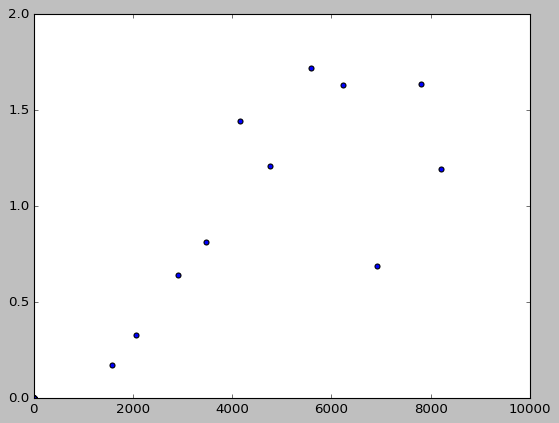

In [ ]:
tmin = -9999.; tmax = 9999.; 
lag_dist = 200; lag_tol = 200; 
nlag = 50; bandh = 9999.9; azi = 75; atol = 90.0; isill = 1

lag_dist = 700; lag_tol = 500; nlag = 20
 
lag, gamma, npair = geostats.gamv(well_creta,"UTM X","UTM Y","TVD",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

plt.scatter(lag, gamma)
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.show()

Updating field in ipywidget

In [ ]:
from ipywidgets import interact, Dropdown

geo = {'Base Cretaceous': 50,
       'Top Etive': 90}
countryW = Dropdown(options = geo.keys())
# cityW = Dropdown()
cityW = widgets.FloatSlider(min=10, max=1000)

@interact(country = countryW, city = cityW)
def print_city(country, city):
    cityW.value = geo[country] # Here is the trick, i.e. update cityW.options based on country, namely countryW.value.
    # print(country, city)


interactive(children=(Dropdown(description='country', options=('Base Cretaceous', 'Top Etive'), value='Base Cr…

In [ ]:
from ipywidgets import interact, Dropdown

geo = {'USA':['CHI','NYC'],'Russia':['MOW','LED']}
countryW = Dropdown(options = geo.keys())
cityW = Dropdown()

@interact(country = countryW, city = cityW)
def print_city(country, city):
    cityW.options = geo[country] # Here is the trick, i.e. update cityW.options based on country, namely countryW.value.
    # print(country, city)

interactive(children=(Dropdown(description='country', options=('USA', 'Russia'), value='USA'), Dropdown(descri…